<center><img src="https://cdn.dribbble.com/userupload/21656162/file/original-b2caa8e219bb54b29d2a4eff8ccd2a82.gif"></center>
<center><h1 style="font-family: parklane">°°°📊🌏The Data world📊🌏°°°</h1></center>
<center><h3 style="font-family: times-new-roman; font-size: 1.728em">- An analysis of parties in comparison and trend -</h3></center>

<p style="font-family: times-new-roman">From 09/01/2021 to 10/04/2021, Kaggle conducted it's 5th
annual industry-wide survey in providing a truly comprehensive view of the state of data science and machine learning and related feilds.</p>
<p style="font-family: times-new-roman">If you are a student who is interested in such feilds, a job seeker, or if you want to switch your career, YOU are invited!</p>
<p style="font-family: times-new-roman"><b> Lets take a look! 💫</center></b></p>

<center><h1 style="font-family: parklane">°°°🔎Exploratory data analysis (EDA)🔎°°°</h1></center>

In [158]:
## 📖 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #For plotting

In [159]:
%ls *.csv

 Volume in drive C is OS
 Volume Serial Number is CAF8-56E2

 Directory of C:\Users\ragha\OneDrive\Desktop\General assembly\Python\Python Project

02/20/2025  01:30 PM        35,203,886 kaggle_survey_2021_responses.csv
               1 File(s)     35,203,886 bytes
               0 Dir(s)  33,552,076,800 bytes free


In [160]:
data_df = pd.read_csv("kaggle_survey_2021_responses.csv")
data_df.head()

C:\Users\ragha\AppData\Local\Temp\ipykernel_28756\247489734.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("kaggle_survey_2021_responses.csv")


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [162]:
# To retrieve the number of questions we have from the datasets
questions = [q.split("_")[0] for q in data_df.columns]
q_nums = pd.unique(questions)
len(q_nums)

C:\Users\ragha\AppData\Local\Temp\ipykernel_28756\1538729315.py:3: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  q_nums = pd.unique(questions)


43

In [163]:
# Now we want to explore the survey questions to formulate the questions;
#To Create a dataframe only with the question number and the orginal text of the questions
q_text = data_df.columns.to_frame()
q_text["Qs"] = data_df.iloc[0].transpose()
q_text.reset_index(drop=True, inplace=True)
q_text.columns = ["Question", "Question Number"]
print(q_text.shape)
q_text

(369, 2)


,Question,Question Number
0,Time from Start to Finish (seconds),Duration (in seconds)
1,Q1,What is your age (# years)?
2,Q2,What is your gender? - Selected Choice
3,Q3,In which country do you currently reside?
4,Q4,What is the highest level of formal education ...
...,...,...
364,Q38_B_Part_8,"In the next 2 years, do you hope to become mor..."
365,Q38_B_Part_9,"In the next 2 years, do you hope to become mor..."
366,Q38_B_Part_10,"In the next 2 years, do you hope to become mor..."
367,Q38_B_Part_11,"In the next 2 years, do you hope to become mor..."


<h3 style="font-family: times-new-roman; font-size: 1.5em">🪛🔧Re-shaping the datasets🪛🔧</h3>

<p style="font-family: times-new-roman">Going over the questions in the previous dataframe we created is a bit hard, one approach to make things easier is to rename the columns to have Better readability of the code</p>

In [165]:
# having the second row as the header, so the head row will be the questions statments
new_header = data_df.iloc[0]
data_df = data_df[1:]
data_df.columns = new_header

In [166]:
# Here we will rename the columns using a new choosen dictionary
new_column_names = {
    #basic info
    'Duration (in seconds)': 'duration_sec',
    'What is your age (# years)?': 'age',
    'What is your gender? - Selected Choice': 'gender',
    'In which country do you currently reside?': 'country',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'education',
    'Select the title most similar to your current role (or most recent title if retired): - Selected Choice': 'job_title',
    'For how many years have you been writing code and/or programming?': 'coding_experience',

    #Programming languages used
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python': "python",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R': "R",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL':"SQL",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C': "C",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++' : "C++",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java': "Java",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript':"JSC",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia': "Julia",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift': "Swift",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash' :"Bash",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB':"MATLAB",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None':"None",
   'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other':"Other",
    #integrated development environments
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ": 'ide_jupyter',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - PyCharm ":'ide_pycharm',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio ": 'ide_rstudio',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio ":'ide_visual_studio',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) ":'ide_visual_studio_code',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Spyder  ":'ide_spyder',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Notepad++  ":'ide_notepad',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Sublime Text  ":'ide_sublime_text',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Vim / Emacs  ":'ide_vim_emacs',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  MATLAB ":'ide_matlab',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook":'ide_jupyter_notebook',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - None":'ide_none',
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other":'ide_other',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm': 'IDE_PyCharm',

    "What type of computing platform do you use most often for your data science projects? - Selected Choice": "computing_platform",
    

    # Hosted Notebook Products
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks": "notebook_kaggle",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks": "notebook_colab",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Azure Notebooks": "notebook_azure",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Paperspace / Gradient ": "notebook_paperspace",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Binder / JupyterHub ": "notebook_binder",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Code Ocean ": "notebook_code_ocean",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  IBM Watson Studio ": "notebook_ibm_watson",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Notebooks ": "notebook_sagemaker",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks ": "notebook_amazon_emr",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Notebooks (AI Platform / Vertex AI) ": "notebook_google_cloud",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Datalab": "notebook_google_datalab",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks ": "notebook_databricks",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Zeppelin / Zepl Notebooks ": "notebook_zeppelin",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Deepnote Notebooks ": "notebook_deepnote",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Observable Notebooks ": "notebook_observable",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - None": "notebook_none",
    "Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other": "notebook_other",

    # Specialized Hardware
    "Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  NVIDIA GPUs ": "hardware_nvidia_gpu",
    "Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud TPUs ": "hardware_google_tpu",
    "Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Trainium Chips ": "hardware_aws_trainium",
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Inferentia Chips': 'Hardware_AWS_Inferentia',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - None': 'Hardware_None',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other': 'Hardware_Other',

    'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice': 'lang_recommend',
    
    

    # TPU usage
    "Approximately how many times have you used a TPU (tensor processing unit)?": "tpu_usage",

    # Data Visualization
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ": "matplotlib",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Seaborn ": "seaborn",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Plotly / Plotly Express ": "plotly",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ": "ggplot",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Shiny ": "shiny",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3 js ": "d3",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Altair ": "altair",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Bokeh ": "bokeh",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Geoplotlib ": "geoplotlib",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Leaflet / Folium ": "leaflet",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - None": "none",
    "What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other": "other",

    # Machine Learning Algorithms
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression': "Linear/Logistic Regression",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests': "Decision Trees/Random Forests",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Gradient Boosting Machines (xgboost, lightgbm, etc)': "Gradient Boosting (XGBoost, LightGBM)",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Bayesian Approaches': "Bayesian Approaches",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Evolutionary Approaches': "Evolutionary Approaches",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Dense Neural Networks (MLPs, etc)': "Dense Neural Networks (MLPs)",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Convolutional Neural Networks': "Convolutional Neural Networks",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Generative Adversarial Networks': "Generative Adversarial Networks",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Recurrent Neural Networks': "Recurrent Neural Networks",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-3, etc)': "Transformer Networks (BERT, GPT-3)",
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - None': 'ML_Algorithms_None',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other': 'ML_Algorithms_Other',

    # Machine Learning
    "For how many years have you used machine learning methods?" : "experience",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ": "scikit_learn",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   TensorFlow ": "tensorflow",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Keras ": "keras",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch ": "pytorch",
    'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Fast.ai ':"fast_ai",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  MXNet ": "mxnet",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Xgboost ": "xgboost",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  LightGBM ": "lightgbm",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  CatBoost ": "catboost",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Prophet ": "prophet",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  H2O 3 ": "h2o3",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Caret ": "caret",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Tidymodels ": "tidymodels",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  JAX ": "jax",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch Lightning ": "pytorch_lightning",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Huggingface ": "huggingface",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - None": "none",
    "Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other": "other",

    #categories of computer vision methods
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)": "cv_general_tools",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Image segmentation methods (U-Net, Mask R-CNN, etc)": "cv_segmentation",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Object detection methods (YOLOv3, RetinaNet, etc)": "cv_object_detection",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)": "cv_classification",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Generative Networks (GAN, VAE, etc)": "cv_generative",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None": "cv_none",
    "Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other": "cv_other",
    
    # Natural Language Processing (NLP) Methods
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)': "NLP_Word_Embeddings",
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Encoder-decorder models (seq2seq, vanilla transformers)': "NLP_Encoder_Decoder",
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)': "NLP_Contextualized_Embeddings",
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)': "NLP_Transformer_Models",
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None': "NLP_None",
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other': "NLP_Other",

    # Employer & Business Information
    'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice': "Industry",
    'What is the size of the company where you are employed?': "Company_Size",
    'Approximately how many individuals are responsible for data science workloads at your place of business?': "Data_Science_Team_Size",
    'Does your current employer incorporate machine learning methods into their business?': "ML_Usage_in_Business",

    # Job Role Activities
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions': "Role_Analyze_Data",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': "Role_Data_Infrastructure",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas': "Role_Build_Prototypes",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows': "Role_ML_Service",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models': "Role_ML_Experimentation",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning': "Role_ML_Research",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work': "Role_None",
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other': "Role_Other",

    'What is your current yearly compensation (approximate $USD)?': 'yearly_income',
    'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?': 'ml_cloud_spending_5y',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) ': 'cloud_aws',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure ': 'cloud_azure',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ': 'cloud_gcp',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat ': 'cloud_ibm',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Oracle Cloud ': 'cloud_oracle',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  SAP Cloud ': 'cloud_sap',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Salesforce Cloud ': 'cloud_salesforce',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  VMware Cloud ': 'cloud_vmware',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Alibaba Cloud ': 'cloud_alibaba',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud ': 'cloud_tencent',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - None': 'cloud_none',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other': 'cloud_other',
    'Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice': 'best_cloud_experience',
    'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2) ': 'cloud_ec2',
    'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure Virtual Machines ': 'cloud_azure_vm',
    'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine ': 'cloud_gce',
    'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - No / None': 'cloud_products_none',
    'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Other': 'cloud_products_other',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure Data Lake Storage ': 'storage_azure_datalake',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure Disk Storage ': 'storage_azure_disk',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice -  Amazon Simple Storage Service (S3)  ': 'storage_aws_s3',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice -  Amazon Elastic File System (EFS)  ': 'storage_aws_efs',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Storage (GCS)   ': 'storage_gcp_gcs',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Filestore ': 'storage_gcp_filestore',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice - No / None': 'storage_none',
    'Do you use any of the following data storage products on a regular basis? (Select all that apply) - Selected Choice - Other': 'storage_other',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Amazon SageMaker ': 'ml_aws_sagemaker',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Azure Machine Learning Studio ': 'ml_azure_ml',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Vertex AI': 'ml_gcp_vertex',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  DataRobot': 'ml_datarobot',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Databricks': 'ml_databricks',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Dataiku': 'ml_dataiku',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Alteryx': 'ml_alteryx',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Rapidminer': 'ml_rapidminer',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - No / None': 'ml_products_none',
    'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Other': 'ml_products_other',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL ': 'bigdata_mysql',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL ': 'bigdata_postgresql',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite ': 'bigdata_sqlite',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database ': 'bigdata_oracle',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MongoDB ': 'bigdata_mongodb',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Snowflake ': 'bigdata_snowflake',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Db2 ': 'BigData_IBM_Db2',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server ': 'BigData_MSSQL_Server',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure SQL Database ': 'BigData_Azure_SQL',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure Cosmos DB ': 'BigData_Azure_Cosmos_DB',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Redshift ': 'BigData_Amazon_Redshift',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Aurora ': 'BigData_Amazon_Aurora',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon RDS ': 'BigData_Amazon_RDS',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon DynamoDB ': 'BigData_Amazon_DynamoDB',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud BigQuery ': 'BigData_Google_BigQuery',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL ': 'BigData_Google_SQL',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Firestore ': 'BigData_Google_Firestore',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud BigTable ': 'BigData_Google_BigTable',
'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Spanner ': 'BigData_Google_Spanner',

    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - None': 'bigdata_none',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Other': 'bigdata_other',

    
     # Big Data Products
    
    "Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice": "big_data_product",
    
    # Business Intelligence Tools
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon QuickSight": "bi_amazon_quicksight",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Power BI": "bi_power_bi",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Google Data Studio": "bi_google_data_studio",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Looker": "bi_looker",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Tableau": "bi_tableau",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Salesforce": "bi_salesforce",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Tableau CRM": "bi_tableau_crm",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Qlik": "bi_qlik",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Domo": "bi_domo",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - TIBCO Spotfire": "bi_tibco_spotfire",
    # Business Intelligence Tools
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Alteryx ': 'BI_Alteryx',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Sisense ': 'BI_Sisense',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - SAP Analytics Cloud ': 'BI_SAP_Analytics_Cloud',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure Synapse ': 'BI_Azure_Synapse',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Thoughtspot ': 'BI_Thoughtspot',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - None ': 'BI_None',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Other ': 'BI_Other',

# Automated Machine Learning Tools (AutoML)
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations) ': 'AutoML_Data_Augmentation',
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated feature engineering/selection (e.g. tpot, boruta_py) ': 'AutoML_Feature_Engineering',
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated model selection (e.g. auto-sklearn, xcessiv) ': 'AutoML_Model_Selection',
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated model architecture searches (e.g. darts, enas) ': 'AutoML_Model_Architecture_Searches',
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier) ': 'AutoML_Hyperparameter_Tuning',
'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverle) ' : 'Automation of full ML pipelines ',

    
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Alteryx": "bi_alteryx",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Sisense": "bi_sisense",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - SAP Analytics Cloud": "bi_sap_analytics_cloud",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure Synapse": "bi_azure_synapse",
    "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Thoughtspot": "bi_thoughtspot",
    "Which of the following business intelligence tools do you use most often? - Selected Choice": "bi_most_used",
    
    # AutoML Tools
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)": "automl_data_augmentation",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated feature engineering/selection (e.g. tpot, boruta_py)": "automl_feature_engineering",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated model selection (e.g. auto-sklearn, xcessiv)": "automl_model_selection",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated model architecture searches (e.g. darts, enas)": "automl_model_architecture",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)": "automl_hyperparameter_tuning",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)": "automl_full_pipeline",
    
    # Machine Learning Experiment Management Tools
    "Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - Neptune.ai": "ml_exp_neptune",
    "Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - Weights & Biases": "ml_exp_weights_biases",
    "Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - Comet.ml": "ml_exp_comet",
    "Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - TensorBoard": "ml_exp_tensorboard",
    "Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - MLflow": "ml_exp_mlflow",
    
    # Public Sharing Platforms
    "Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice - GitHub": "public_github",
    "Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice - Kaggle": "public_kaggle",
    "Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice - Personal blog": "public_blog",
    
    # Data Science Learning Platforms
    "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera": "ds_learning_coursera",
    "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX": "ds_learning_edx",
    "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity": "ds_learning_udacity",
    
    # Primary Data Analysis Tool
    "What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice": "primary_data_tool",

    # Cloud Computing Platforms (Future Learning)
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Amazon Web Services (AWS)": "future_cloud_aws",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Microsoft Azure": "future_cloud_azure",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Google Cloud Platform (GCP)": "future_cloud_gcp",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  IBM Cloud / Red Hat": "future_cloud_ibm",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Oracle Cloud": "future_cloud_oracle",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  SAP Cloud": "future_cloud_sap",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  VMware Cloud": "future_cloud_vmware",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Salesforce Cloud": "future_cloud_salesforce",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Alibaba Cloud": "future_cloud_alibaba",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Tencent Cloud": "future_cloud_tencent",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - None": "future_cloud_none",
"Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Other": "future_cloud_other",

# Specific Cloud Computing Products (Future Learning)
"In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2)": "future_cloud_product_ec2",
"In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice -  Microsoft Azure Virtual Machines": "future_cloud_product_azure_vm",
"In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine": "future_cloud_product_gcp_compute",
"In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice - None": "future_cloud_product_none",
"In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice - Other": "future_cloud_product_other",

# Specific Data Storage Products (Future Learning)
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice - Microsoft Azure Data Lake Storage": "future_storage_azure_data_lake",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice - Microsoft Azure Disk Storage": "future_storage_azure_disk",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice -  Amazon Simple Storage Service (S3)": "future_storage_aws_s3",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice -  Amazon Elastic File System (EFS)": "future_storage_aws_efs",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice - Google Cloud Storage (GCS)": "future_storage_gcp_gcs",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice -  Google Cloud Filestore": "future_storage_gcp_filestore",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice - No / None": "future_storage_none",
"In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply) - Selected Choice - Other": "future_storage_other",
# Managed Machine Learning Products
    
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Amazon SageMaker': 'SageMaker',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Azure Machine Learning Studio ': 'AzureMLStudio',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Google Cloud Vertex AI': 'VertexAI',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  DataRobot': 'DataRobot',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Databricks': 'Databricks',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Dataiku': 'Dataiku',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Alteryx': 'Alteryx',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice -  Rapidminer': 'Rapidminer',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice - None': 'NoneML',
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice - Other': 'OtherML',

# Big Data Products

    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - MySQL ': 'MySQL',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - PostgreSQL ': 'PostgreSQL',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - SQLite ': 'SQLite',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Oracle Database ': 'OracleDB',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - MongoDB ': 'MongoDB',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Snowflake ': 'Snowflake',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - IBM Db2 ': 'IBMDb2',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft SQL Server ': 'MSSQLServer',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft Azure SQL Database ': 'AzureSQL',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft Azure Cosmos DB ': 'AzureCosmosDB',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon Redshift ': 'Redshift',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon Aurora ': 'Aurora',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon DynamoDB ': 'DynamoDB',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon RDS ': 'RDS',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud BigQuery ': 'BigQuery',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud SQL ': 'GCPSQL',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud Firestore ': 'GCPFirestore',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud BigTable ': 'GCPBigTable',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud Spanner ': 'GCPSpanner',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - None': 'NoneBD',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Other': 'OtherBD',


# Business Intelligence Tools

    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft Power BI': 'PowerBI',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon QuickSight': 'QuickSight',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Data Studio': 'DataStudio',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Looker': 'Looker',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Tableau': 'Tableau',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Salesforce': 'Salesforce',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Tableau CRM': 'TableauCRM',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Qlik': 'Qlik',
    'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Domo': 'Domo',

    # Automated Machine Learning Tool Categories
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)': 'AutoML_Augmentation',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated feature engineering/selection (e.g. tpot, boruta_py)': 'AutoML_FeatureEngineering',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated model selection (e.g. auto-sklearn, xcessiv)': 'AutoML_ModelSelection',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated model architecture searches (e.g. darts, enas)': 'AutoML_ArchitectureSearch',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)': 'AutoML_HyperparameterTuning',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI)': 'AutoML_FullPipeline',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - None': 'AutoML_None',
'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Other': 'AutoML_Other',

# Specific Automated Machine Learning Tools
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -  Google Cloud AutoML ': 'Google_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -  H2O Driverless AI  ': 'H2O_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -  Databricks AutoML ': 'Databricks_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -  DataRobot AutoML ': 'DataRobot_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -   Amazon Sagemaker Autopilot ': 'Sagemaker_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -   Azure Automated Machine Learning ': 'Azure_AutoML',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - None': 'AutoML_None_Specific',
'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Other': 'AutoML_Other_Specific',
# Machine Learning Tools Management

    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Neptune.ai': 'ml_tools_neptune',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Weights & Biases': 'ml_tools_weights_and_biases',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Comet.ml': 'ml_tools_comet_ml',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Sacred + Omniboard': 'ml_tools_sacred_omniboard',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  TensorBoard': 'ml_tools_tensorboard',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Guild.ai': 'ml_tools_guild_ai',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Polyaxon': 'ml_tools_polyaxon',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  ClearML': 'ml_tools_clearml',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Domino Model Monitor': 'ml_tools_domino_monitor',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  MLflow': 'ml_tools_mlflow',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - No / None': 'ml_tools_none',
    'Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice - Other': 'ml_tools_other',
    
    # Public Sharing of Data Analysis or ML Applications
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Plotly Dash': 'public_share_plotly_dash',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Streamlit': 'public_share_streamlit',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  NBViewer': 'public_share_nbviewer',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  GitHub': 'public_share_github',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Personal blog': 'public_share_personal_blog',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Kaggle': 'public_share_kaggle',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Colab': 'public_share_colab',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Shiny': 'public_share_shiny',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice - I do not share my work publicly': 'public_share_no_public_sharing',
    'Where do you publicly share your data analysis or machine learning applications? (Select all that apply) - Selected Choice - Other': 'public_share_other',
    
    # Data Science Learning Platforms
    'ds_learning_coursera': 'ds_learning_coursera',
    'ds_learning_edx': 'ds_learning_edx',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses': 'ds_learning_kaggle',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp': 'ds_learning_datacamp',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai': 'ds_learning_fastai',
    'ds_learning_udacity': 'ds_learning_udacity',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy': 'ds_learning_udemy',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning': 'ds_learning_linkedin_learning',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)': 'ds_learning_cloud_certifications',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree)': 'ds_learning_university_courses',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None': 'ds_learning_none',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other': 'ds_learning_other',
    


# ML Experiment Management Tools
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Neptune.ai ': 'Neptune',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Weights & Biases ': 'Weights_Biases',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Comet.ml ': 'Comet_ml',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Sacred + Omniboard ': 'Sacred_Omniboard',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  TensorBoard ': 'TensorBoard',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Guild.ai ': 'Guild_ai',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Polyaxon ': 'Polyaxon',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  ClearML ': 'ClearML',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Domino Model Monitor ': 'Domino_Monitor',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  MLflow ': 'MLflow',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None': 'ML_None',
'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other': 'ML_Other',

    
}

data_df = data_df.rename(columns=new_column_names).copy()

data_df.head()


,duration_sec,age,gender,country,education,job_title,coding_experience,python,R,SQL,...,Comet_ml,Sacred_Omniboard,TensorBoard,Guild_ai,Polyaxon,ClearML,Domino_Monitor,MLflow,ML_None,ML_Other
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<<center><h1 style="font-family: parklane">✨Data analysis°✨</h1></center>
<h3 style="font-family: times-new-roman; font-size: 1.5em">Now, once we got our cleaned dataset, the questions are ready🍽️..</h3>

<p style="font-family: times-new-roman">Let's explore different aspects of the data🔎✨:</p>

<center><h2 style="font-family: parklane">Demographics and Trends 📈</h2></center>

<p style="font-family: times-new-roman">If you are considering coding or data science, data analysis, you probably wondered about what is the famous notebook, or the most learned programming language. <b>Here, the data shows intresting results and answers.</b>.</p>

</div>

<p style="font-family: times-new-roman"></p>

<center><h3 style="font-family: parklane">1.1🗺️ Country/ Gender distributions🗺️</h3></center>

C:\Users\ragha\AppData\Local\Temp\ipykernel_28756\1307225529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  woman_df = data_df[woman_filter][country_filter].groupby(['gender', 'country'])['age'].count().reset_index()
C:\Users\ragha\AppData\Local\Temp\ipykernel_28756\1307225529.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  man_df = data_df[man_filter][country_filter].groupby(['gender', 'country'])['age'].count().reset_index()


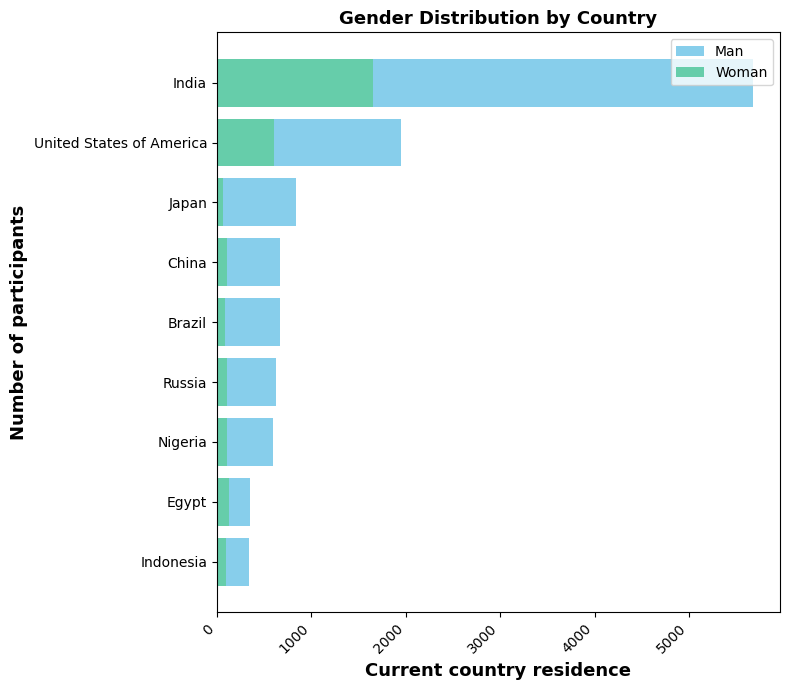

In [170]:
#Creating two seperate dataframes (to get equal charts) of the two gender
#The dataframes were filtered based on the count of countries

woman_filter = data_df['gender'].isin(['Woman'])
country_filter=data_df['country'].isin(['India','United States of America','Egypt','Nigeria','China','Indonesia','Russia','Japan','Brazil'])
woman_df = data_df[woman_filter][country_filter].groupby(['gender', 'country'])['age'].count().reset_index()
woman_df = woman_df.sort_values(by='age', ascending=True).head(11)
woman_df=pd.DataFrame(woman_df)
woman_df

man_filter = data_df['gender'].isin(['Man'])
country_filter=data_df['country'].isin(['India','United States of America','Egypt','Nigeria','China','Indonesia','Russia','Japan','Brazil'])
man_df = data_df[man_filter][country_filter].groupby(['gender', 'country'])['age'].count().reset_index()
man_df = man_df.sort_values(by='age', ascending=True).head(10)
man_df=pd.DataFrame(man_df)
man_df

# Creating bar chart plot to compare the countries
plt.figure(figsize=(8,7))  

plt.barh(man_df["country"], man_df["age"], label="Man",color='skyblue')
plt.barh(woman_df["country"], woman_df["age"], label="Woman",color='mediumaquamarine')

plt.xlabel("Current country residence",fontsize=13,fontweight='bold')
plt.ylabel("Number of participants",fontsize=13,fontweight='bold')
plt.title("Gender Distribution by Country",fontsize=13,fontweight='bold')

plt.legend(loc="upper right")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('gender_rregion.png')
plt.show()

In [171]:
# what are the percentages of both genders?
men = data_df[data_df['gender'] == 'Man']['gender'].count()
women = data_df[data_df['gender'] == 'Woman']['gender'].count()
percentage_women = (women / (men + women)) * 100
percentage_men = (men / (men + women)) * 100
print(f"Percentage of Women: {percentage_women:.2f}%")
print(f"Percentage of Men: {percentage_men:.2f}%")


Percentage of Women: 19.19%
Percentage of Men: 80.81%


<h3 style="font-family: times-new-roman; font-size: 1.5em">A huge gender gap is there👀! with a ratio of <b>👩🏻‍💻20:80🧑🏻‍💻<b> </h3>
<p style="font-family: times-new-roman">A large deviation between the number of participants is almost everywhere, The men have the highest occupation in data science and machine learning/related fields with the percentage of 80%..</p>

<p style="font-family: times-new-roman"> Country Distributions are almost the same with the majority coming from <b>India and USA</b>.

<center><h3 style="font-family: parklane">1.2 Which programming languages are most commonly used by participants💻?</h3></center>

In [ ]:
# A saperate dataframe is created to answer the question
df_languages = data_df[["python", "R","SQL","C","C++","Java","JSC","Julia","Swift","Bash","MATLAB","Other"]]

# Number of the responses in each column have been summed, and nulls have been removed, so it's kind of grouped by programming language 
languages_count=df_languages.notnull().sum()
languages_count.sort_values(ascending=False)
# A barh plot is created to visualize the results
languages_count.plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="mediumaquamarine")
plt.xlabel("Number of users", fontsize=13, fontweight="bold")
plt.ylabel("Programming Languages", fontsize=12, fontweight="bold")
plt.title("Programming Languages", fontsize= 15, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()



 <p style="font-family: times-new-roman">It is clearly seen that the top 3 most used programming languages are (1. Python. 2. SQL. 3. C++). We can do anything in python, not just data analysis but programming and web development and other things as well, which is one reason that it's the most used programming language by the respondants of this survey✨.</p>

### 1.3 What are the most used libraries for visualization🪄?

In [ ]:
# Like we did above, we are creating a saperate dataframe for this question as well
libraries= data_df[[ "matplotlib", "seaborn", "plotly", "ggplot", "shiny", "d3", "altair", "bokeh", "geoplotlib", "leaflet", "other"]]
libraries
libraries
# counting the libraries in each column, which is going to be kind of grouping by, and then sorting them in descending order
library_counts = libraries.count().sort_values(ascending=False)
# creating the plot barh:
library_counts.plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="mediumaquamarine")

plt.xlabel("Visualization Libraries", fontsize=15, fontweight="bold")
plt.ylabel("Number of Users", fontsize=15, fontweight="bold")
plt.title("Most Used Libraries for Data Visualization", fontsize= 15, fontweight="bold")
plt.xticks(rotation=45) 
plt.grid(axis="x", linestyle="--", alpha=0.7)  

#plt.show()
plt.savefig('vis_plot.png')

<p style="font-family: Times New Roman;"> Here, the chart shows which libraries do our participants use to visualize their insights, and here are the top 3:<br>
    1. matplotlib.<br>
    2. seaborn.<br>
    3. plotly.
</p>

<center><h3 style="font-family: parklane"> 1.4 Job titles: Who are the participants?</h3></center>

In [ ]:
# To know who are our respondants are, we took the data from the original table, and grouped by job title and counted the number of participants in each job.
participants = data_df.groupby("job_title")["job_title"].count().sort_values(ascending=False)
# A barh chart was a good option to display the results so here is the code:
participants.plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="mediumaquamarine")

plt.xlabel("Number of Participants", fontsize=15, fontweight="bold")
plt.ylabel("Job Title",fontsize=15, fontweight="bold")
plt.title("Who are the participants", fontsize= 20, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)  

#plt.show()
plt.savefig('users_plot.png')

<p style="font-family: Times New Roman;"> Here, the chart shows that who are our respondants, and here are the top 5 titles:<br>
    1. Students.<br>
    2. Data Scientists.<br>
    3. Software Engineers.<br>
    4. Data Analysts.<br>
    5. Research Scientists.
</p>

<center><h2 style="font-family: parklane">Workflow🧩</h2></center>

<center><h3 style="font-family: parklane">2.1 How many years of experience are required for each job title 🎯?</h3></center>

In [ ]:
#Filtering the values with minute frequencies
job_filter = (data_df["job_title"] != "Student") & \
             (data_df["job_title"] != "DBA/Database Engineer") & \
             (data_df["job_title"] != "Developer Relations/Advocacy") & \
             (data_df["job_title"] != "Developer Relations/Advocacy") & \
             (data_df["job_title"] != "Currently not employed") & \
             (data_df["job_title"] != "Other") & \
             (data_df["job_title"] != "Product Manager")& \
             (data_df["job_title"] != "Statistician")
coding_filter=(data_df["coding_experience"] != "I have never written code")
education_filter=(data_df["education"] !="No formal education past high school")& (data_df["education"] !="I prefer not to answer")&(data_df["education"] !="Some college/university study without earning a bachelor’s degree")

In [ ]:
#Creating a data frame for the desired question
exp_title_df = data_df[job_filter][coding_filter]
exp_title_df =exp_title_df.groupby(['coding_experience','job_title'])['age'].count().reset_index().sort_values(by='coding_experience', ascending=False)
exp_title_df=pd.DataFrame(exp_title_df)

#Here, we will order the column value manullay because the datatype are given as range, a string
order = [
   "20+ years",
    "10-20 years",
    "5-10 years",
    "3-5 years",
    "1-3 years",
    "< 1 years"
]
exp_title_df["coding_experience"] = pd.Categorical(
    exp_title_df["coding_experience"],
    categories=order,
    ordered=True

)

plt.figure(figsize=(9,5))
plt.title("Coding experience Vs Job title", fontsize=16, fontweight="bold")
plt.xlabel("Job Title",fontweight="bold", fontsize=14)
plt.ylabel("Coding expereince",fontweight="bold", fontsize=14)
plt.xticks(rotation=45.0)


sns.scatterplot(
    data=exp_title_df,
    x="job_title",
    y="coding_experience",
    sizes=(60, 660),
    size="age",
    #palette="viridis",
    hue="age"
)
plt.legend(
bbox_to_anchor=(1, 1), loc="upper left", title="Number of participant", fontsize=10, title_fontsize=10, )
plt.tight_layout()
plt.savefig('coding_experience.png')
plt.show()


<p style="font-family: times-new-roman">The majority of respondents have <b>1-3 year of experience</b>. Participants of different background experience vary from profession in coding to beginners. <b>So, you can start from any level!💡<b>.
   <b> However, interesting trends can be noticed from the plot:</p>

* <p style="font-family: times-new-roman"> Data science particpant's experience peaks at 3-10 years of coding experience<b>
* <p style="font-family: times-new-roman">Most of the Software Engineer participants are professionals in coding.</b>.</p>



<center><h3 style="font-family: parklane">2.2 What are the educational backgrounds of participants👩🏻‍🎓🧑🏻‍🎓</h3></center>

In [ ]:
#Creating a filtered data frame
education_df=data_df.groupby(['job_title', 'education'])['age'].count().reset_index().sort_values(by='age', ascending=False)
education_df=pd.DataFrame(education_df)
education_df
filtered_data_df = data_df[job_filter][education_filter]
education_df = pd.crosstab(filtered_data_df['job_title'], filtered_data_df['education'], normalize='index') * 100
education_df = pd.DataFrame(education_df)
education_df

#Creating a Stacked barchart plot to show the frequencies of the education degrees among different job titles
fig, ax = plt.subplots(figsize=(9, 4))
pl = education_df.plot( kind="barh",stacked=True,colormap="Blues_r", alpha=0.85, ax=ax)
ax.set_title("Education Distribution across Job titles (%)", fontsize=14, fontweight="bold")
ax.set_xlabel("Percentege of participant", fontsize=10,fontweight='bold')
ax.set_ylabel("Career position", fontsize=10,fontweight='bold')
ax.legend(title="", loc="upper left",bbox_to_anchor=(1, 1.02), fontsize=7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('education_plot.png')
plt.show()


<h3 style="font-family: times-new-roman; font-size: 1.5em">Seems like becoming a machine learning engineer or a data scientist does not necessarily require a Master degree! Many of bachelour's degree holders are there..<b> </h3>
<p style="font-family: times-new-roman">However, Data engineer, Business analyst, and project manager jobs have a large number of participant with a masters degree, more than the bachelour's..</p>
<p style="font-family: times-new-roman"> If you want to become a reserch scientist, large opportunities are for ones who earend their doctorate! 

<center><h3 style="font-family: parklane"> 2.3 Yearly income X job titles, who earned more 💰?</h3></center>

In [ ]:
#Creating a dataframe
salary_filter=data_df['yearly_income'].groupby(data_df['yearly_income']).count().head(11).index 
salary_data_df = data_df[job_filter & education_filter & data_df['yearly_income'].isin(salary_filter)] 
salary_df = pd.crosstab(salary_data_df['job_title'], salary_data_df['yearly_income'], normalize='index') * 100 #Recalculate salary_df
salary_df
#Plotting a heatmap to visualize the frequency distributions 

#correcting salary order manually
salary_order = [
   "$0-999", "1,000-1,999",
    "10,000-14,999", "15,000-19,999",
    "100,000-124,999", "125,000-149,999", "150,000-199,999",'2,000-2,999',	'20,000-24,999','200,000-249,999'
]
salary_df = salary_df.reindex(columns=salary_order)

plt.figure(figsize=(12, 8))
#Note: the annot parameter is to have the percentege for each cell
sns.heatmap(salary_df, cmap="GnBu", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Yearly income Distribution Across Job Titles (%)", fontsize=17, fontweight='bold')
plt.xlabel("Yearly income Range", fontsize=13, fontweight='bold')
plt.ylabel("Job Title", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig('salary_plot.png')
plt.show()


<center><h3 style="font-family: parklane"> 2.4 How do programming languages preferences vary based on Job titles🤔?</h3></center>

In [ ]:
# A saperate dataframe is made for this question as well, and the column job_title is added along with the programming languages
df_exp_languages = data_df[job_filter][["job_title","python", "R","SQL","C","C++","Java","JSC","Julia","Swift","Bash","MATLAB"]]
df_exp_languages
# count of the programming languages was grouped by the job titles, so the result shows what programming languages do different jobs use the most.
language_prefs = df_exp_languages.groupby("job_title").count()
language_prefs.sort_values(by="python")
# The values are being sorted by ascending is this step
language_prefs.sort_values(by="python").head()
# A heatmap is created to display the results
plt.figure(figsize=(10,6))
sns.heatmap(language_prefs.sort_values(by="python"), cmap='GnBu')
plt.title("Preferred programming languages according to job titles", fontsize = 15, fontweight="bold")
plt.xlabel("Preferred programming language", fontsize=12, fontweight="bold")
plt.ylabel("Job title", fontsize=13, fontweight="bold") 
plt.xticks(rotation =45,fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('lang_plot.png')

<p style="font-family: Times New Roman;">
    This heatmap shows which jobs use the top three programming languages the most:<br>
    1. Python users are mostly (Students, Data Scientists, and Software Engineers).<br>
    2. SQL is mostly used by (Students, Data Scientists, and Data Analysts).<br>
    3. C++ is also used mostly by Students.<br>
    Which concludes that different programming languages are being taught in a vast majority to students so they have more career options according to their skills.</p>

<center><h2 style="font-family: parklane"> 3 Machine learning🌌</h2></center>

<center><h3 style="font-family: parklane"> 3.1 What Machine Learning algorithms are used on regular basis by the participants?</h3></center>

In [ ]:
# A saperate dataframe is created here as well to answer the questions
ml_alg_df = data_df[['Linear/Logistic Regression',
 'Decision Trees/Random Forests',
 'Gradient Boosting (XGBoost, LightGBM)',
 'Bayesian Approaches',
 'Evolutionary Approaches',
 'Dense Neural Networks (MLPs)',
 'Convolutional Neural Networks',
 'Generative Adversarial Networks',
 'Recurrent Neural Networks',
 'Transformer Networks (BERT, GPT-3)']]
ml_alg_df
# Each column's values have been counted, which by default exculded the nulls, and then the values were sorted by ascending
ml_algorithm_counts = ml_alg_df.count()
ml_algorithm_counts.sort_values()
# A barh plot is the best option to show the results for this question, so here it is:
plt.figure(figsize=(12, 6))
ml_algorithm_counts.sort_values(ascending=False).plot(kind='barh', stacked=True, color="skyblue", edgecolor="mediumaquamarine", figsize=(12, 6))
plt.title(" Most common Machine Learning Algorithms", fontsize=20, fontweight="bold")
plt.xlabel("Number of users", fontsize=15, fontweight="bold")
plt.ylabel("Machine Learning Algorithms", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7) 
plt.tight_layout()
#plt.show()
plt.savefig('alogrithms_plot.png')

<p style="font-family: Times New Roman;"> The chart above highlights the Machine Learning algorithms that are used on regular basis by the participants, and the top 3 are:<br>
    1. Linear/ Regression.<br>
    2. Decision Trees/ Random Forests.<br>
    3. Gradient Boosting (XGBoost, LightGBM)<br>
</p>

<center><h3 style="font-family: parklane"> 3.2 What are the machine learning frameworks used on regular basis by our participants based on their experience in Machine Learning?</h3></center>

In [ ]:
# A saperate dataframe is created to answer this question as well
ml_frameworks_df = data_df[["experience", "scikit_learn", "tensorflow", "keras","pytorch","fast_ai", "mxnet", "xgboost", "lightgbm", "catboost","prophet", "h2o3",
"caret", "tidymodels","jax","pytorch_lightning", "huggingface"]]
ml_frameworks_df
# dropping the unwanted category
ml_frameworks_df = ml_frameworks_df[ml_frameworks_df["experience"] != "I do not use machine learning methods"]
# grouping by experience and counting the frameworks (which will by default drop the nulls)
frameworks_exp = ml_frameworks_df.groupby("experience").count()
frameworks_exp.sort_values(by="scikit_learn")
plt.figure(figsize=(12, 8))
#Note: the annpt parameter is to have the percentege for each cell
sns.heatmap(frameworks_exp.sort_values(by="scikit_learn"), cmap="GnBu")

# Labels
plt.title("Machine Learning frameworks used based on experience", fontsize=16, fontweight='bold')
plt.xlabel("Machine Learning frameworks", fontsize=12, fontweight='bold')
plt.ylabel("Experience", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
# Show plot
plt.show()
plt.savefig('frameworks_plot.png')

<p style="font-family: Times New Roman;"> This heatmap shows the Machine Learning frameworks participants use based on their experience in Machine Learning, and here are the top 3 frameworks:<br>
    1. scikit_learn: it is the most used framework by participants who have experience from under 1 year to even 4 to 5 years.<br>
    2. tensorflow: The second most-used framework, primarily adopted by people with experience ranging from under 1 year to 2–3 years.<br>
    3. keras: Also used by people with experience ranging from under 1 year to 2–3 years, but with fewer users than tensorflow.
</p>

<center><h3 style="font-family: times-new-roman; font-size: 1.728em">-The data have been taken from Kaggle official website:-</h3></center>
<a href="https://www.kaggle.com/c/kaggle-survey-2021/data" target="_blank">Open My Notebook</a>
